In [1]:
# Mise à jour de setuptools
!pip install --upgrade setuptools

# Installation de pandas et matplotlib
!pip install --upgrade pandas
!pip install matplotlib

In [2]:
!pip install pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg  # Assurez-vous que avg est bien importé

# Création de la session Spark
spark = SparkSession.builder \
    .appName("Analyse de données massives") \
    .getOrCreate()


In [3]:
# Chargement de la base de données depuis un fichier CSV
df = spark.read.format("csv") \
    .option("header", "true") \
    .option("delimiter", ";") \
    .load("C:/Users/badre/Desktop/INSA/M1/S8/BigData/reu.csv")

In [4]:
# Renommer les colonnes pour remplacer les points-virgules par des underscores
new_column_names = [col.replace(";", "_") for col in df.columns]
df = df.toDF(*new_column_names)

# Affichage du schéma et des premières lignes
df.printSchema()
df.show(5)

# Nettoyage des données (exemple : suppression des doublons)
df_cleaned = df.dropDuplicates()

root
 |-- gd_discipline: string (nullable = true)
 |-- gd_discipline_lib: string (nullable = true)
 |-- discipline: string (nullable = true)
 |-- discipline_lib: string (nullable = true)
 |-- sect_disciplinaire: string (nullable = true)
 |-- sect_disciplinaire_lib: string (nullable = true)
 |-- serie_bac: string (nullable = true)
 |-- serie_bac_lib: string (nullable = true)
 |-- age_au_bac: string (nullable = true)
 |-- age_au_bac_lib: string (nullable = true)
 |-- sexe: string (nullable = true)
 |-- sexe_lib: string (nullable = true)
 |-- mention_bac: string (nullable = true)
 |-- mention_bac_lib: string (nullable = true)
 |-- cohorte_passage: string (nullable = true)
 |-- effectif_neobacheliers_passage: string (nullable = true)
 |-- passage_en_l2_1_an: string (nullable = true)
 |-- redoublement_en_l1: string (nullable = true)
 |-- passage_en_l2_2_ans: string (nullable = true)
 |-- passage_en_l2_1_2_ans: string (nullable = true)
 |-- reorientation_en_dut_1_an: string (nullable = true)

+-------------+----------+------------------+
|gd_discipline|discipline|  avg_passage_rate|
+-------------+----------+------------------+
|        STAPS|        10|32.982142857142854|
|         LLSH|        06|11.281121187139323|
|          DSA|        02|13.399497487437186|
|          DSA|        01| 33.79514824797844|
|         LLSH|        05| 24.42339832869081|
|           SI|        15| 5.402597402597403|
|         LLSH|        04|12.472647702407002|
|          DSA|        03|12.651898734177216|
|         LLSH|        32|  4.63855421686747|
|           SI|        09|12.925373134328359|
|           SI|        33| 19.18439716312057|
|        SANTE|        11|               2.0|
+-------------+----------+------------------+



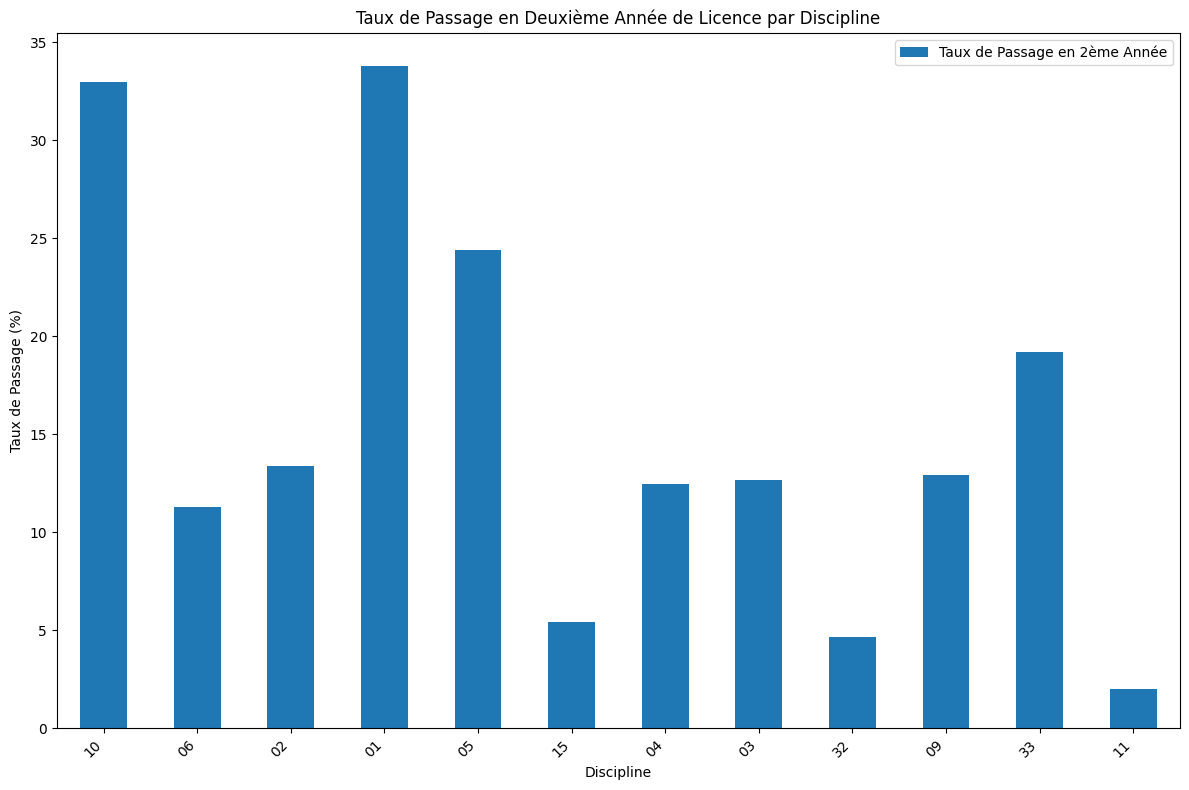

In [5]:
# Importer matplotlib pour la visualisation
import matplotlib.pyplot as plt

# Comparaison des taux de passage en deuxième année de licence par discipline
passage_rates = df_cleaned.groupBy("gd_discipline", "discipline").agg(avg("passage_en_l2_1_an").alias("avg_passage_rate"))
passage_rates.show()

# Convertir en Pandas pour la visualisation
passage_rates_pd = passage_rates.toPandas()

# Créer un graphique à barres pour les taux de passage en deuxième année de licence
fig, ax = plt.subplots(figsize=(12, 8))

# Tracer les barres
passage_rates_pd.plot(kind="bar", x="discipline", y="avg_passage_rate", ax=ax)

# Ajouter des labels et un titre
ax.set_xlabel("Discipline")
ax.set_ylabel("Taux de Passage (%)")
ax.set_title("Taux de Passage en Deuxième Année de Licence par Discipline")
ax.legend(["Taux de Passage en 2ème Année"])

# Afficher le graphique
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


+-----------+------------------------+
|mention_bac|avg_success_rate_3_years|
+-----------+------------------------+
|          Q|       1.278393351800554|
|          B|      14.190095846645367|
|          D|      10.572963294538944|
|          C|      15.960084033613445|
|          A|       9.394904458598726|
|          P|      2.1448412698412698|
+-----------+------------------------+



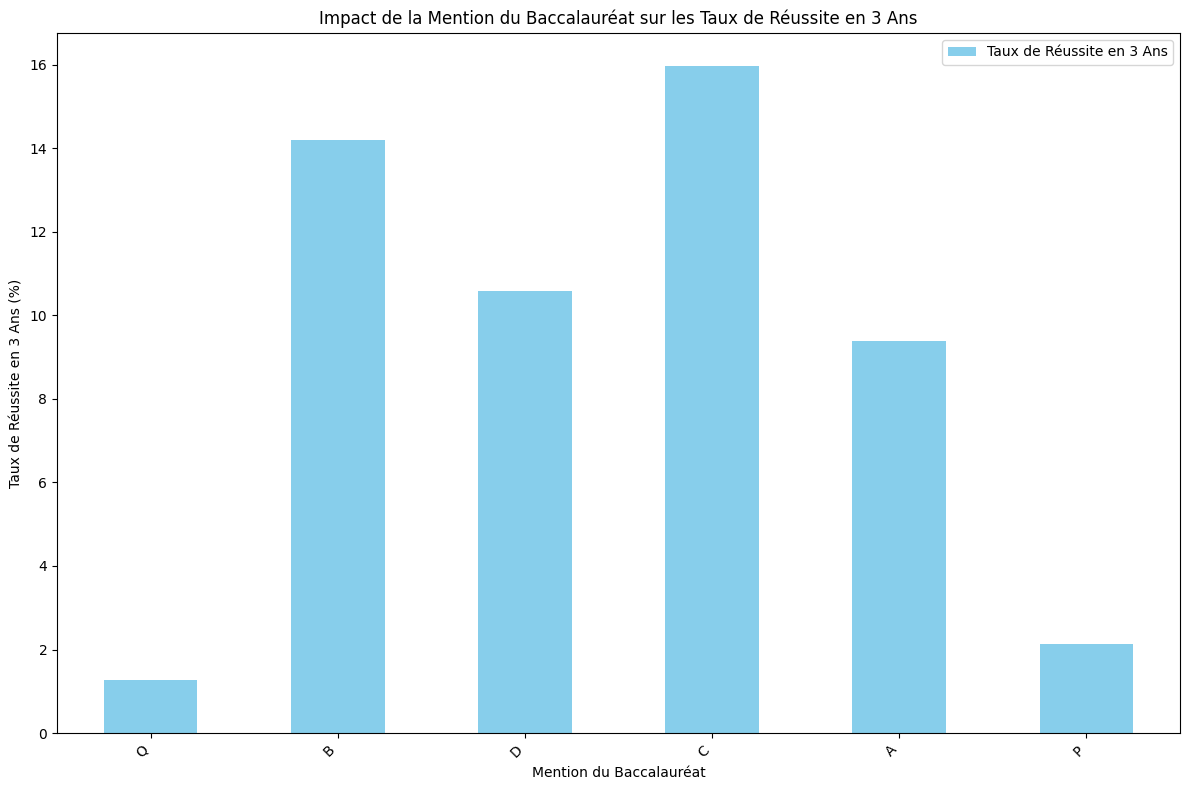

In [6]:
# Évaluation de l'impact de la mention du baccalauréat sur les taux de réussite
mention_impact = df_cleaned.groupBy("mention_bac").agg(avg("reussite_3_ans").alias("avg_success_rate_3_years"))
mention_impact.show()

# Convertir en Pandas pour la visualisation
mention_impact_pd = mention_impact.toPandas()

# Créer un graphique à barres pour les taux de réussite en trois ans par mention du baccalauréat
fig, ax = plt.subplots(figsize=(12, 8))

# Tracer les barres
mention_impact_pd.plot(kind="bar", x="mention_bac", y="avg_success_rate_3_years", ax=ax, color='skyblue')

# Ajouter des labels et un titre
ax.set_xlabel("Mention du Baccalauréat")
ax.set_ylabel("Taux de Réussite en 3 Ans (%)")
ax.set_title("Impact de la Mention du Baccalauréat sur les Taux de Réussite en 3 Ans")
ax.legend(["Taux de Réussite en 3 Ans"])

# Afficher le graphique
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


+----+----------+-------------------+
|sexe|age_au_bac|avg_redoubling_rate|
+----+----------+-------------------+
|   1|        R1|  7.336111111111111|
|   1|        R0| 14.297619047619047|
|   2|        R4| 16.885714285714286|
|   2|        R0| 16.802197802197803|
|   2|        R2|  3.367983367983368|
|   2|        R1|  7.294853963838665|
|   1|        R2| 3.1720841300191203|
|   1|        R4| 12.878453038674033|
+----+----------+-------------------+



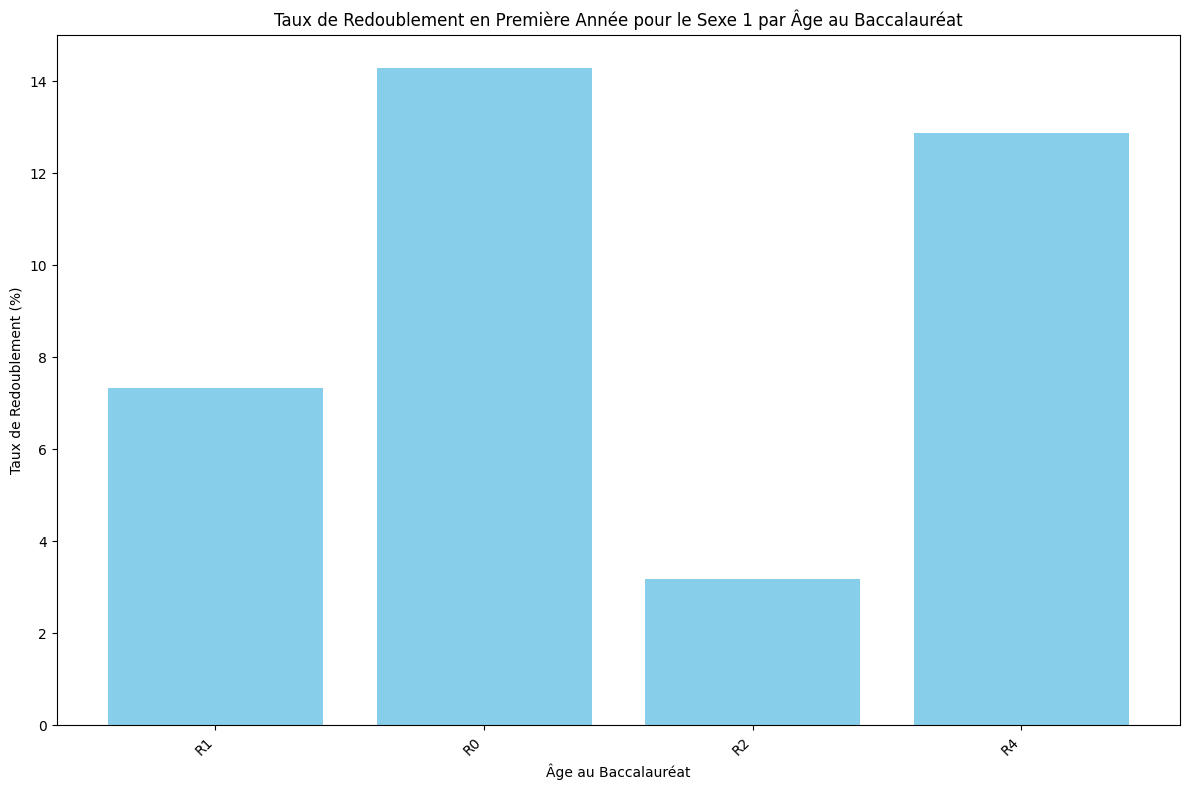

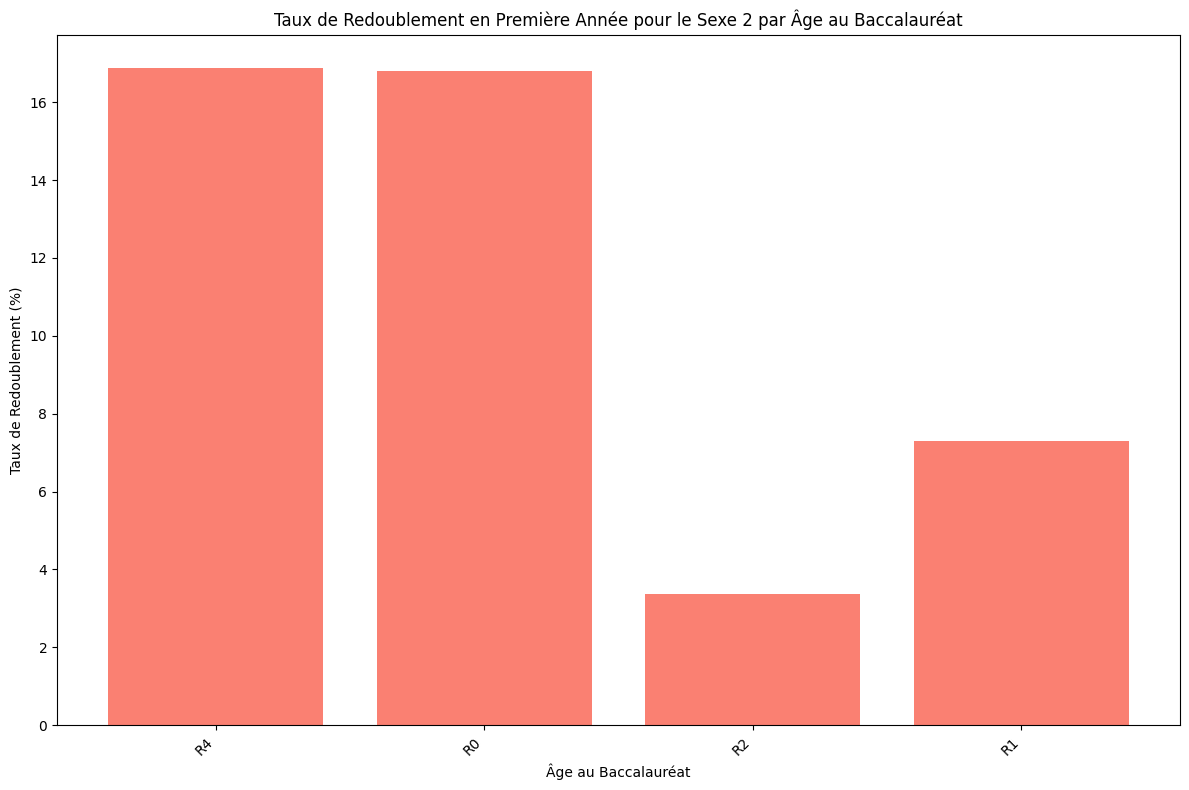

In [8]:
# Analyse des tendances de redoublement par sexe et âge au baccalauréat
redoubling_trends = df_cleaned.groupBy("sexe", "age_au_bac").agg(avg("redoublement_en_l1").alias("avg_redoubling_rate"))
redoubling_trends.show()

# Convertir en Pandas pour la visualisation
redoubling_trends_pd = redoubling_trends.toPandas()

# Créer un graphique à barres pour les taux de redoublement en première année par sexe et âge au baccalauréat

# Graphique pour le sexe 1
fig, ax = plt.subplots(figsize=(12, 8))
subset_sexe_1 = redoubling_trends_pd[redoubling_trends_pd['sexe'] == '1']
ax.bar(subset_sexe_1['age_au_bac'], subset_sexe_1['avg_redoubling_rate'], color='skyblue')

# Ajouter des labels et un titre
ax.set_xlabel("Âge au Baccalauréat")
ax.set_ylabel("Taux de Redoublement (%)")
ax.set_title("Taux de Redoublement en Première Année pour le Sexe 1 par Âge au Baccalauréat")

# Afficher le graphique
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Graphique pour le sexe 2
fig, ax = plt.subplots(figsize=(12, 8))
subset_sexe_2 = redoubling_trends_pd[redoubling_trends_pd['sexe'] == '2']
ax.bar(subset_sexe_2['age_au_bac'], subset_sexe_2['avg_redoubling_rate'], color='salmon')

# Ajouter des labels et un titre
ax.set_xlabel("Âge au Baccalauréat")
ax.set_ylabel("Taux de Redoublement (%)")
ax.set_title("Taux de Redoublement en Première Année pour le Sexe 2 par Âge au Baccalauréat")

# Afficher le graphique
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



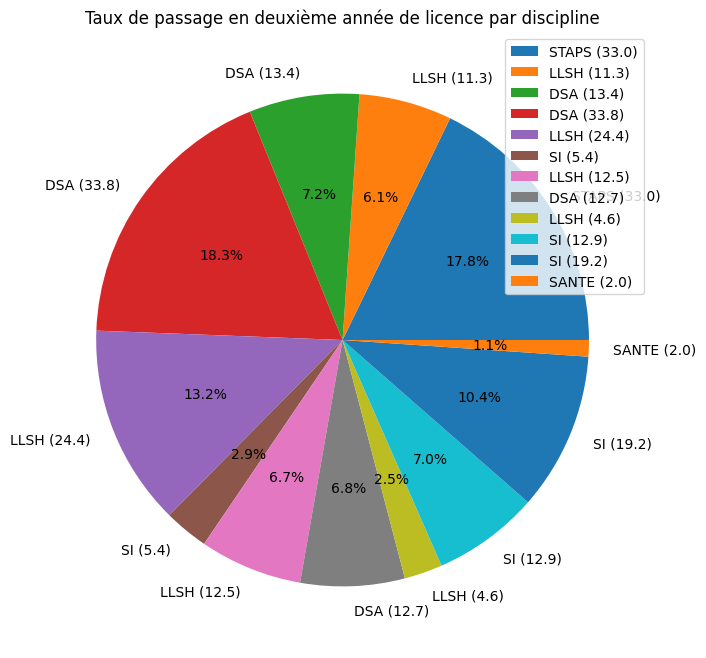

In [9]:
# Convertir en Pandas pour la visualisation
passage_rates_pd = passage_rates.toPandas()

# Créer des labels combinant gd_discipline et avg_passage_rate
passage_rates_pd['label'] = passage_rates_pd.apply(lambda row: f"{row['gd_discipline']} ({row['avg_passage_rate']:.1f})", axis=1)

# Visualisation des résultats (diagramme en secteurs pour les taux de passage par discipline)
passage_rates_pd.plot(kind="pie", y="avg_passage_rate", labels=passage_rates_pd["label"], autopct="%1.1f%%", figsize=(8, 8))
plt.title("Taux de passage en deuxième année de licence par discipline")
plt.ylabel("")
plt.show()


+-------------+----------+------------------------+------------------------+--------------------------+
|gd_discipline|discipline|avg_success_rate_3_years|avg_success_rate_4_years|avg_success_rate_3_4_years|
+-------------+----------+------------------------+------------------------+--------------------------+
|        STAPS|        10|      21.108974358974358|       9.467948717948717|        30.576923076923077|
|         LLSH|        06|       7.687188019966722|      2.4525790349417638|        10.139767054908486|
|          DSA|        02|       8.671328671328672|       4.018648018648019|         12.68997668997669|
|          DSA|        01|       21.26279069767442|      11.576744186046511|         32.83953488372093|
|         LLSH|        05|      13.412037037037036|      5.6782407407407405|         19.09027777777778|
|           SI|        15|       2.165903890160183|      1.3157894736842106|        3.4816933638443937|
|         LLSH|        04|       7.413533834586466|      2.42669

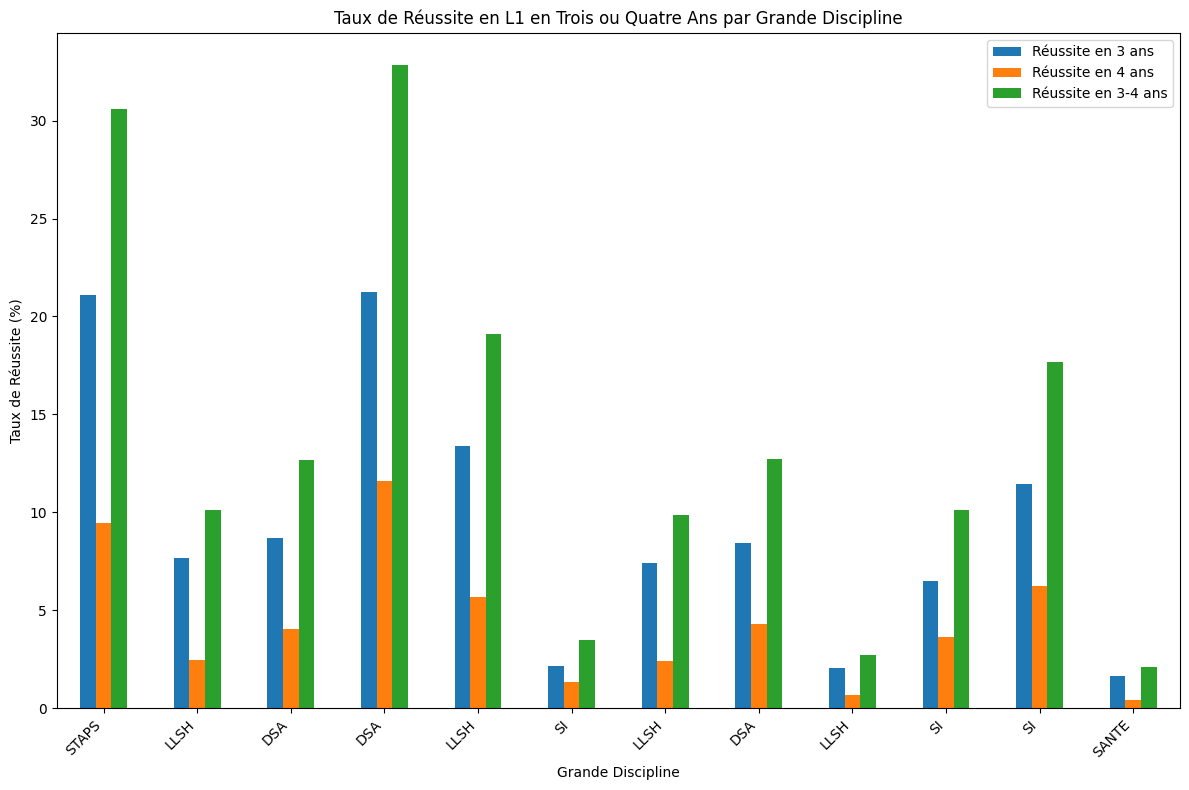

In [10]:
# Calcul des taux de réussite en trois ou quatre ans par gd_discipline et discipline
success_rates = df_cleaned.groupBy("gd_discipline", "discipline").agg(
    avg("reussite_3_ans").alias("avg_success_rate_3_years"),
    avg("reussite_4_ans").alias("avg_success_rate_4_years"),
    avg("reussite_3_4_ans").alias("avg_success_rate_3_4_years")
)
success_rates.show()

# Convertir en Pandas pour la visualisation
success_rates_pd = success_rates.toPandas()

# Créer un graphique à barres pour les taux de réussite en trois ou quatre ans
fig, ax = plt.subplots(figsize=(12, 8))

# Tracer les barres
success_rates_pd.plot(kind="bar", x="gd_discipline", y=["avg_success_rate_3_years", "avg_success_rate_4_years", "avg_success_rate_3_4_years"], ax=ax)

# Ajouter des labels et un titre
ax.set_xlabel("Grande Discipline")
ax.set_ylabel("Taux de Réussite (%)")
ax.set_title("Taux de Réussite en L1 en Trois ou Quatre Ans par Grande Discipline")
ax.legend(["Réussite en 3 ans", "Réussite en 4 ans", "Réussite en 3-4 ans"])

# Afficher le graphique
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [11]:
!pip install dash plotly

   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.5 MB 10.6 MB/s eta 0:00:01
   --- ------------------------------------ 0.6/7.5 MB 8.1 MB/s eta 0:00:01
   ------ --------------------------------- 1.3/7.5 MB 10.2 MB/s eta 0:00:01
   -------------- ------------------------- 2.8/7.5 MB 16.3 MB/s eta 0:00:01
   ------------------------- -------------- 4.7/7.5 MB 21.4 MB/s eta 0:00:01
   --------------------------------- ------ 6.3/7.5 MB 25.1 MB/s eta 0:00:01
   ---------------------------------------- 7.5/7.5 MB 25.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ------ --------------------------------- 2.5/16.4 MB 53.4 MB/s eta 0:00:01
   ---------- ----------------------------- 4.2/16.4 MB 45.3 MB/s eta 0:00:01
   --------------- ------------------------ 6.5/16.4 MB 46.7 MB/s eta 0:00:01
   --------------------- ------------------ 8.9/16.4 MB 47.6 MB/s eta 0:00:01
   --------

In [12]:
# Préparer les données pour les taux de passage et de réussite
passage_rates = df_cleaned.groupBy("cohorte_passage", "gd_discipline").agg(
    avg("passage_en_l2_1_an").alias("avg_passage_rate")
)

success_rates = df_cleaned.groupBy("cohorte_reussite", "gd_discipline").agg(
    avg("reussite_3_ans").alias("avg_success_rate_3_years"),
    avg("reussite_4_ans").alias("avg_success_rate_4_years"),
    avg("reussite_3_4_ans").alias("avg_success_rate_3_4_years")
)

# Convertir les résultats en DataFrame Pandas
passage_rates_pd = passage_rates.toPandas()
success_rates_pd = success_rates.toPandas()

In [14]:
# Importer les bibliothèques nécessaires
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Préparer les données (à partir des DataFrames préparés précédemment)
passage_rates_pd = passage_rates.toPandas()
success_rates_pd = success_rates.toPandas()

# Initialiser l'application Dash
app = dash.Dash(__name__)

# Mise en page de l'application
app.layout = html.Div([
    html.H1("Tableau de Bord Interactif des Taux de Passage et de Réussite en Licence"),

    dcc.Tabs([
        dcc.Tab(label='Taux de Passage', children=[
            dcc.Dropdown(
                id='passage-discipline-dropdown',
                options=[{'label': gd, 'value': gd} for gd in passage_rates_pd['gd_discipline'].unique()],
                value=passage_rates_pd['gd_discipline'].unique()[0],
                multi=False
            ),
            dcc.Graph(id='passage-rate-graph')
        ]),
        dcc.Tab(label='Taux de Réussite', children=[
            dcc.Dropdown(
                id='success-discipline-dropdown',
                options=[{'label': gd, 'value': gd} for gd in success_rates_pd['gd_discipline'].unique()],
                value=success_rates_pd['gd_discipline'].unique()[0],
                multi=False
            ),
            dcc.Graph(id='success-rate-graph')
        ])
    ])
])

# Callback pour mettre à jour le graphique des taux de passage
@app.callback(
    Output('passage-rate-graph', 'figure'),
    [Input('passage-discipline-dropdown', 'value')]
)
def update_passage_graph(selected_discipline):
    filtered_df = passage_rates_pd[passage_rates_pd['gd_discipline'] == selected_discipline]
    fig = px.line(filtered_df, x='cohorte_passage', y='avg_passage_rate',
                  title=f"Taux de Passage en Deuxième Année pour {selected_discipline}",
                  labels={'cohorte_passage': 'Cohorte', 'avg_passage_rate': 'Taux de Passage'})
    return fig

# Callback pour mettre à jour le graphique des taux de réussite
@app.callback(
    Output('success-rate-graph', 'figure'),
    [Input('success-discipline-dropdown', 'value')]
)
def update_success_graph(selected_discipline):
    filtered_df = success_rates_pd[success_rates_pd['gd_discipline'] == selected_discipline]
    fig = px.line(filtered_df, x='cohorte_reussite', y=['avg_success_rate_3_years', 'avg_success_rate_4_years', 'avg_success_rate_3_4_years'],
                  title=f"Taux de Réussite en Licence pour {selected_discipline}",
                  labels={'cohorte_reussite': 'Cohorte', 'value': 'Taux de Réussite'})
    return fig

# Exécuter l'application
if __name__ == '__main__':
    app.run_server(debug=True)
